# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [ ]:
# Prepare Data
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Yes", 2: "No", 3: "No", 4: "No", 5: "No", 6: np.nan, 77: "No", 99: np.nan}) 

dx = da[['DMDMARTLx','RIAGENDRx','RIDAGEYR','DMDEDUC2x']]

dx = dx.loc[(dx.RIDAGEYR >= 35) & (dx.RIDAGEYR <= 50),:].dropna()

In [ ]:
dx.head()

In [ ]:
# Partition Data
married = dx[dx.DMDMARTLx == 'Yes'].dropna()
unmarried = dx[dx.DMDMARTLx == 'No'].dropna()

# Proportion calc
p_m = (married.DMDEDUC2x == 'College').mean()
p_um = (unmarried.DMDEDUC2x == 'College').mean()

# Get Population Size
n_m = len(married)
n_um = len(unmarried)

# Standard Error
se_m = np.sqrt(p_m * (1 - p_m) / n_m)
se_um = np.sqrt(p_um * (1 - p_um) / n_um)

# Confidence Interval
zstar = 1.96
lcb_m = p_m - zstar * se_m
ucb_m = p_m + zstar * se_m
print("Married Females")
print(p_m, se_m, lcb_m,ucb_m)

print("")

lcb_um = p_um - zstar * se_um
ucb_um = p_um + zstar * se_um
print("Unmarried Females")
print(p_um, se_um, lcb_um,ucb_um)


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

Unmarried women have a wider confidence interval because they have a higher standard error. This means there is more variance in this population than that of married women.

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

Using our sample data, we estimate that 33.6% of married women and 20.47% unmarried women have attained a college degree. With 95% confidence, we can estimate that the true population proportion lies between 30.5% - 36.7% for married women and 16.65% - 24.27% for unmarried women.

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [3]:
# Prepare Data
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan}) 

In [ ]:
# Partition Data
female = da[da.RIAGENDRx == 'Female'].dropna()
male = da[da.RIAGENDRx == 'Male'].dropna()

# Proportion calc
p_f = (female.SMQ020x == 'Yes').mean()
p_m = (male.SMQ020x == 'Yes').mean()

# Get Population Size
n_f = len(female)
n_m = len(male)

# Standard Error
se_f = np.sqrt(p_f * (1 - p_f) / n_f)
se_m = np.sqrt(p_m * (1 - p_m) / n_m)

# Difference
d = p_f - p_m
se_d = np.sqrt(se_f**2 + se_m**2)

# Confidence Interval
zstar = 1.96
lcb = d - zstar * se_d
ucb = d + zstar * se_d
print("Difference: Females - Males")
print("Prop F:", round(p_f,5), "Prop M:",round(p_m,5), "Diff Prop", round(d,5))
print("CI: (",lcb,",",ucb, ")")

__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

To provide context as to the magnitude of the difference and its implications for real world analysis.

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

In [ ]:
# Confidence Interval - Female
lcb_f = p_f - zstar * se_f
ucb_f = p_f + zstar * se_f
width_f = ucb_f - lcb_f
print("Female CI: (",lcb_f,",",ucb_f, ") Width: ", round(width_f,5))

print("")

# Confidence Interval - Male
lcb_m = p_m - zstar * se_m
ucb_m = p_m + zstar * se_m
width_m = ucb_m - lcb_m
print("Male CI: (",lcb_m,",",ucb_m, ") Width: ", round(width_m,5))
print("")

print("Width of Difference", ucb - lcb)

Difference between population samples has a wider confidence interval than either of the gender proportions.

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [ ]:
# Centimeters
mean = da["BMXHT"].mean()
sd = da["BMXHT"].std()
n = len(da)
tstar = 1.96
se = sd/np.sqrt(n)

lcb = mean - tstar * se
ucb = mean + tstar * se
(lcb, ucb)

In [ ]:
# Inches
da['BMXHT_in'] = da['BMXHT']/2.54
mean = da["BMXHT_in"].mean()
sd = da["BMXHT_in"].std()
n = len(da)
tstar = 1.96
se = sd/np.sqrt(n)

lcb = mean - tstar * se
ucb = mean + tstar * se
(lcb*2.54, ucb*2.54)

__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

They are the same

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [ ]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 29, 39, 49, 59, 69, 80])

In [ ]:
# Calculate within age/gender groups
bmi = da.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": [np.mean, np.std, np.size]}).unstack()
bmi.columns = ['f_mean','m_mean','f_std','m_std','f_n','m_n']

# Standard Error
bmi["se_f"] = bmi.f_std / np.sqrt(bmi.f_n)
bmi["se_m"] = bmi.m_std / np.sqrt(bmi.m_n)

# Standard Error Difference
bmi["se_diff"] = np.sqrt(se_f**2 + se_m**2)

# Mean Difference
bmi["d"] = bmi.f_mean - bmi.m_mean

# Confidence Interval
bmi["lcb"] = bmi.d - 1.96 * bmi.se_diff
bmi["ucb"] = bmi.d + 1.96 * bmi.se_diff

In [ ]:
# Plot the mean difference in black and the confidence limits in blue
x = np.arange(bmi.shape[0])
pp = sns.pointplot(x, bmi["d"], color='black')
sns.pointplot(x, bmi["lcb"], color='blue')
sns.pointplot(x, bmi["ucb"], color='blue')
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - Male BMI difference")
plt.show()

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

In [ ]:
# width in CI
bmi['width'] = bmi.ucb - bmi.lcb
bmi[['width','se_diff','f_mean','m_mean']]

The greater the variance, the wider the CI. The highest difference in Standard Error comes in the 29-39 age group.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [ ]:
bp = da[['BPXSY1', 'BPXSY2']].dropna()

mean1 = bp.iloc[0].mean()
mean2 = bp.iloc[1].mean()
mean_diff = mean1 - mean2

n = len(bp)

se1 = bp.iloc[0].std()/np.sqrt(n)
se2 = bp.iloc[1].std()/np.sqrt(n)
se_diff = np.sqrt(se1**2 + se2**2)

lcb = mean_diff - 1.96 * se_diff
ucb = mean_diff + 1.96 * se_diff

print(mean1,mean2)
print(mean_diff)
print((lcb,ucb))

__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

No, the confidence interval does not include zero, so there is statistical evidence that the difference is not zero.

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

In [ ]:
print("Measure 1: ", sm.stats.DescrStatsW(bp.iloc[0]).zconfint_mean())
print("Measure 2: ", sm.stats.DescrStatsW(bp.iloc[1]).zconfint_mean())

Width of the within-subject difference less than width of each measure's confidence interval. Implies less variance in the differences between measures within the same subject than the measure itself across different subjects.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [ ]:
# Calculate within age/smoker groups
smoker = da.groupby(["SMQ020x"]).agg({"RIDAGEYR": [np.mean, np.std, np.size]})
smoker.columns = ['avg','stde','n']

# Standard Error
smoker["se"] = smoker.iloc[0,2] / np.sqrt(smoker.iloc[1,2])

# Standard Error Difference
se_diff = np.sqrt(smoker.iloc[0,3]**2 + smoker.iloc[1,3]**2)

# Mean Difference
d = smoker.iloc[0,0] - smoker.iloc[1,0]

# Confidence Interval
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff

print(smoker.avg)
print("")
print(lcb,ucb)


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [10]:
smoker.loc[smoker.SMQ020x == 'Yes', "RIDAGEYR"].head()

0     62
1     53
2     78
6     22
10    46
Name: RIDAGEYR, dtype: int64

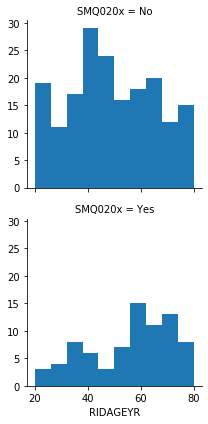

In [27]:
# Histogram
g = sns.FacetGrid(da, row = "SMQ020x") # set up grid
g = g.map(plt.hist, "RIDAGEYR") # what to plot within grid
plt.show()

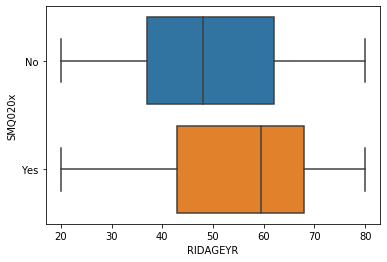

In [28]:
# Box Plot
sns.boxplot(x = da["RIDAGEYR"], y = da["SMQ020x"])
plt.show()

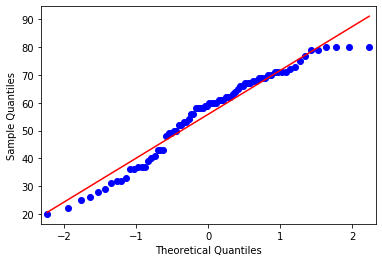

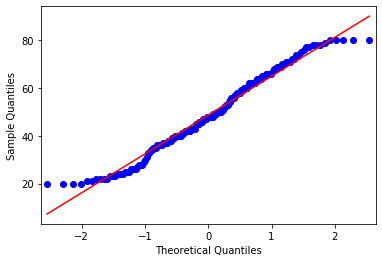

In [29]:
# QQ Plot
sm.qqplot(da.loc[da.SMQ020x == 'Yes', "RIDAGEYR"],line='s')
sm.qqplot(da.loc[da.SMQ020x == 'No', "RIDAGEYR"],line='s')
plt.show()

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?

The mean age of non-smokers appears to have greater variance than the mean age of smokers.